In [16]:
import pandas as pd
import networkx as nx
import sys
from src.utils import fileio, graph_utils

path = "/home/milky/drosophila-SNA/data/processed/1_0_find_interactions"
all_treatments = fileio.load_multiple_folders(path)

graph_functions = graph_utils.local_measures_functions()

for treatment_name, treatment_path in all_treatments.items():
    treatment = fileio.load_files_from_folder(treatment_path)

    for function_name, function_defintion in graph_functions:
        values = {}
       
        for group_name, group_path in treatment.items():
            df_interactions = pd.read_csv(group_path, index_col=0)
            df_interactions = df_interactions.sort_values("start_of_interaction")
            G = nx.DiGraph()

            for _, row in df_interactions.iterrows():
                node_1, node_2 = row["node_1"], row["node_2"]
                duration = row["duration"]
                duration_list = [duration]
                count = 1

                if G.has_edge(node_1, node_2):
                    count += G[node_1][node_2]["count"]
                    duration_list.append(duration)
                else:
                    G.add_edge(node_1, node_2, count=count, duration=duration_list)

            values.update({group_name: function_defintion(G)})


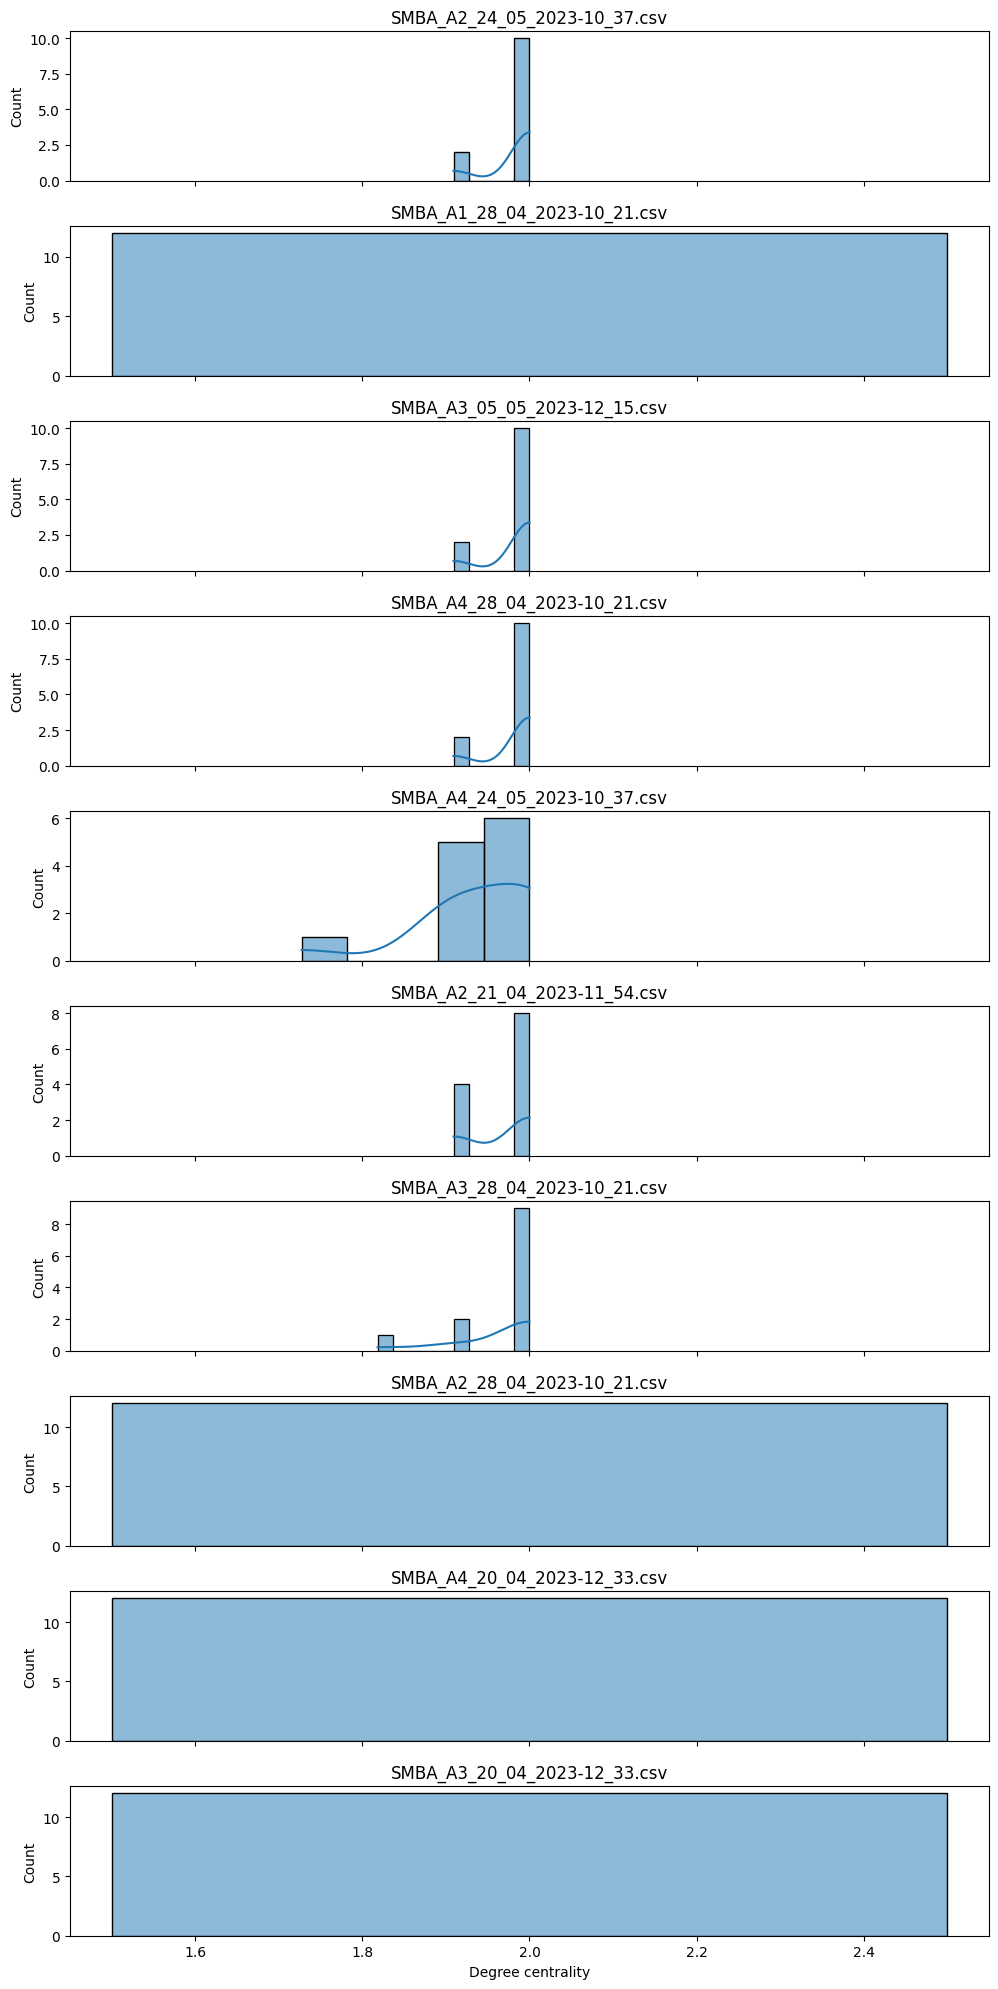

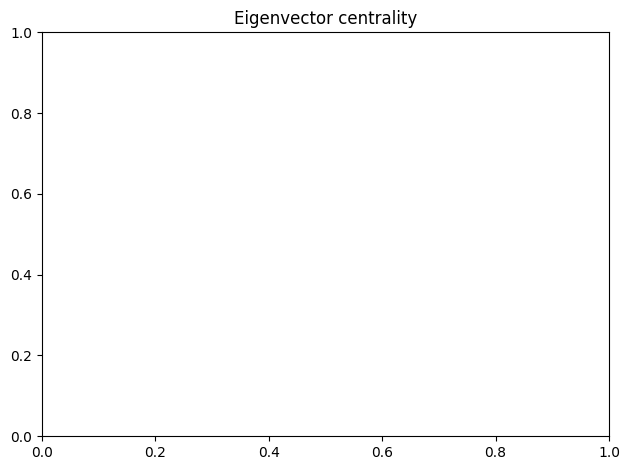

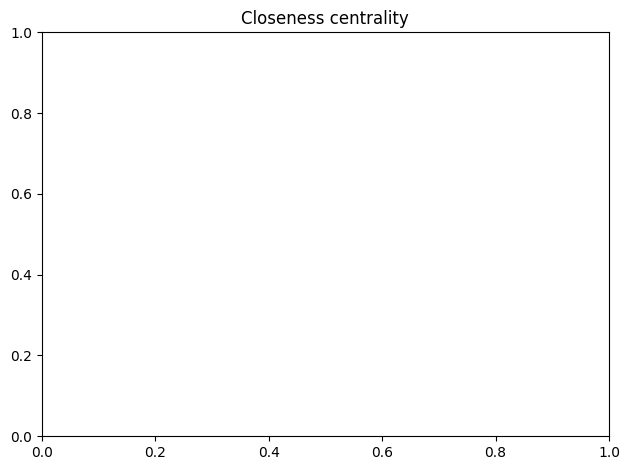

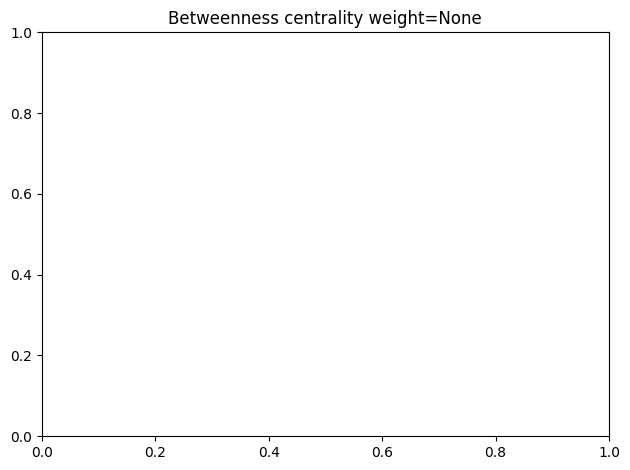

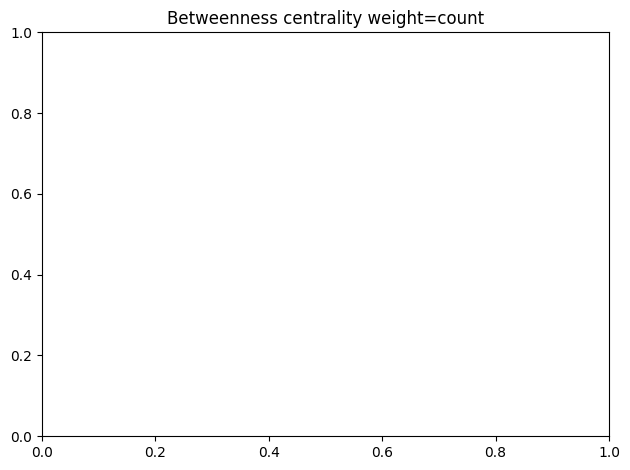

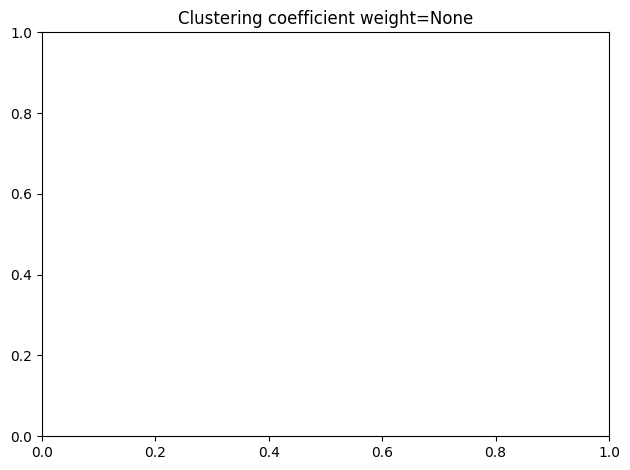

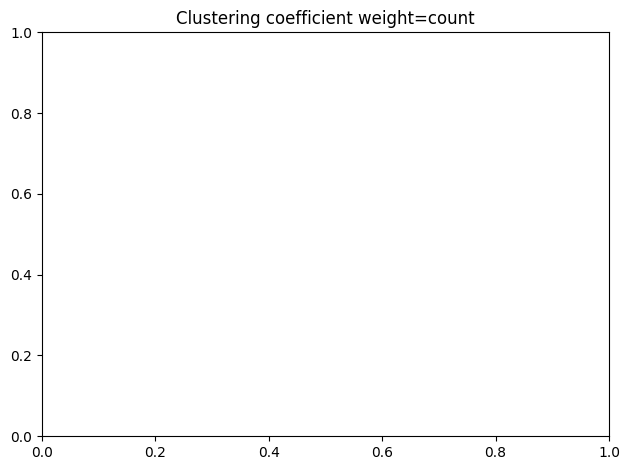

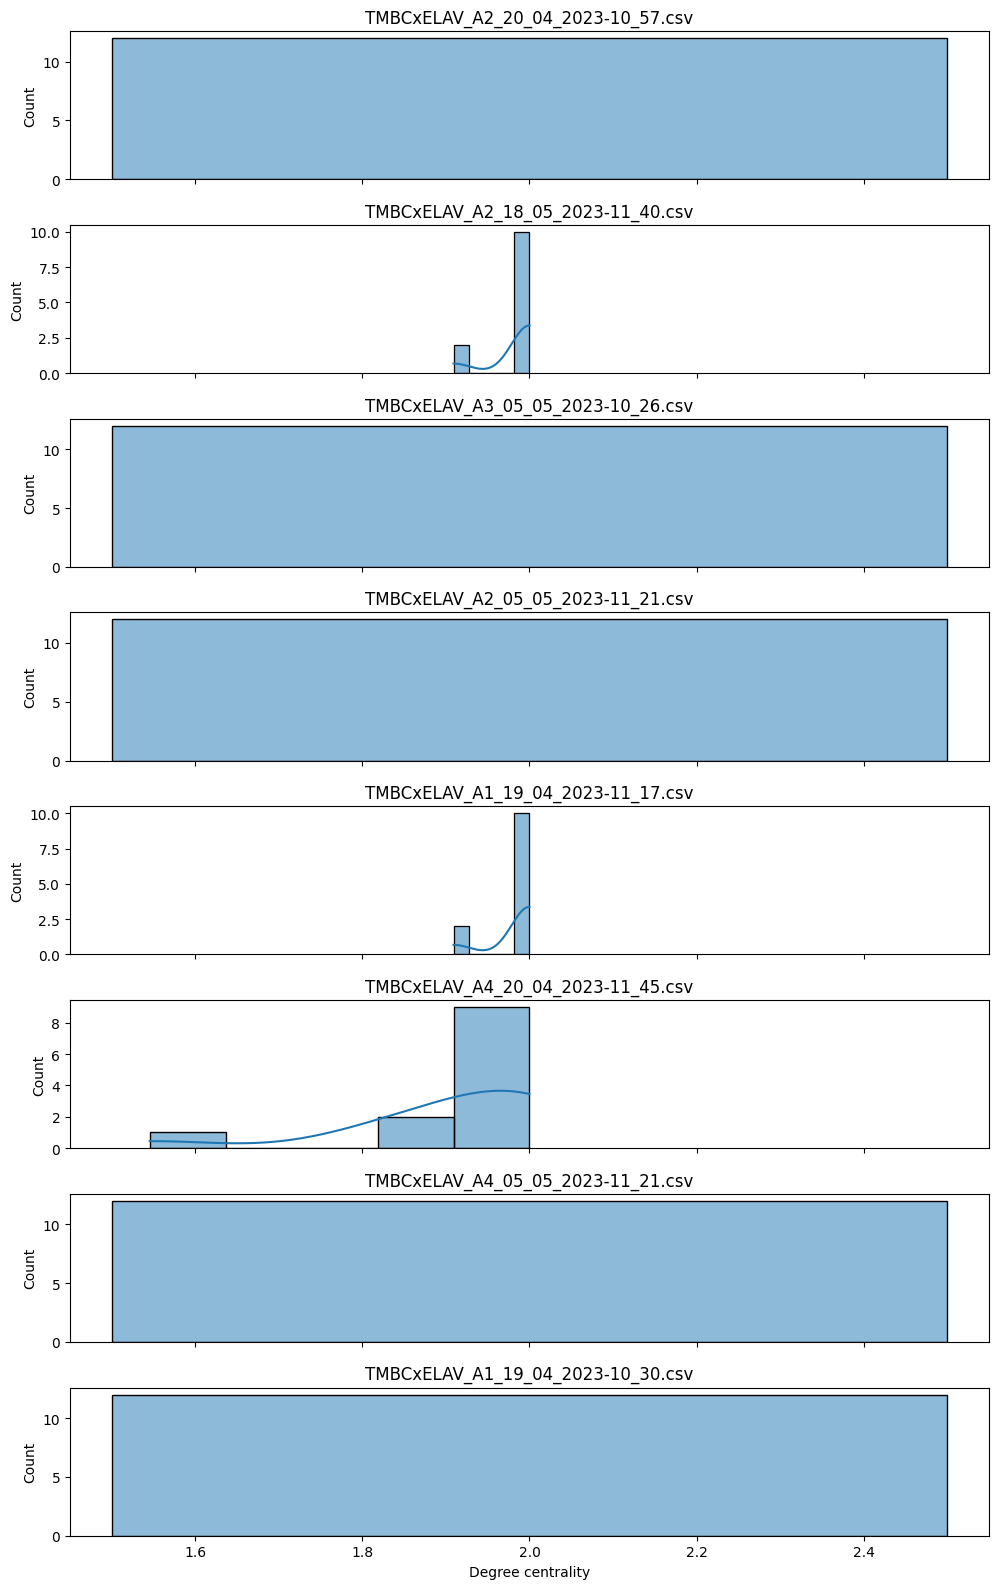

MemoryError: Unable to allocate 3.57 PiB for an array with shape (502946835437127,) and data type float64

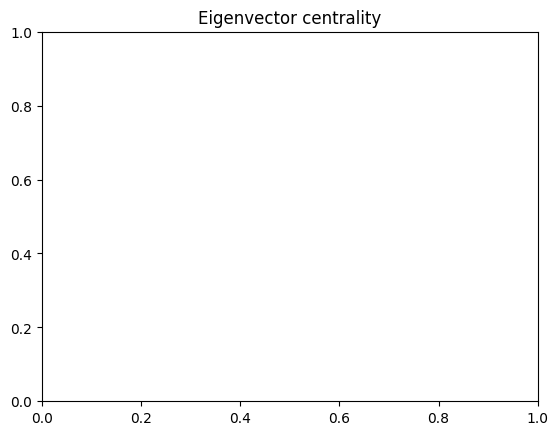

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

graph_functions = graph_utils.local_measures_functions()

for treatment_name, treatment_path in all_treatments.items():
    treatment = fileio.load_files_from_folder(treatment_path)
    num_groups = len(treatment)
    fig, axs = plt.subplots(num_groups, 1, figsize=(10, 2*num_groups), sharex=True)

    for function_name, function_defintion in graph_functions:
        if function_name == 'Strength distribution, weight=count':
            continue

        for i, (group_name, group_path) in enumerate(treatment.items()):
            df_interactions = pd.read_csv(group_path, index_col=0)
            df_interactions = df_interactions.sort_values("start_of_interaction")
            G = nx.DiGraph()
            for _, row in df_interactions.iterrows():
                node_1, node_2 = row["node_1"], row["node_2"]
                duration = row["duration"]
                duration_list = [duration]
                count = 1

                if G.has_edge(node_1, node_2):
                    count += G[node_1][node_2]["count"]
                    duration_list.append(duration)
                else:
                    G.add_edge(node_1, node_2, count=count, duration=duration_list)

            measure_values = function_defintion(G) #, weight=None)
            sns.histplot(data=measure_values, ax=axs[i], kde=True)
            axs[i].set_ylabel('Count')
            axs[i].set_title('{}'.format(group_name))

        axs[-1].set_xlabel(function_name)
        # fig.suptitle('{} distributions for {}'.format(function_name, treatment_name))
        
        plt.tight_layout()
        plt.show()
        # sys.exit()


In [14]:
measure_values

function_name

'Strength distribution, weight=count'